<a href="https://colab.research.google.com/github/arosha27/Week4-LearnPyTorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Neural Network classofication using PyTorch .

#Classification is a priblem of prediction whether something is one thing or another

#importing dependencies

import pandas as pd
import numpy as np
import torch
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Data

In [5]:
X, y = make_circles(n_samples= 1000,noise = 0.02,random_state = 42)
len(X) , len(y)

(1000, 1000)

In [6]:
X[:10] , y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [7]:
Circles  = pd.DataFrame({"X1": X[:,0], "X2" : X[:,1] , "lable" : y[:]})
Circles.head(10)

,X1,X2,lable
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


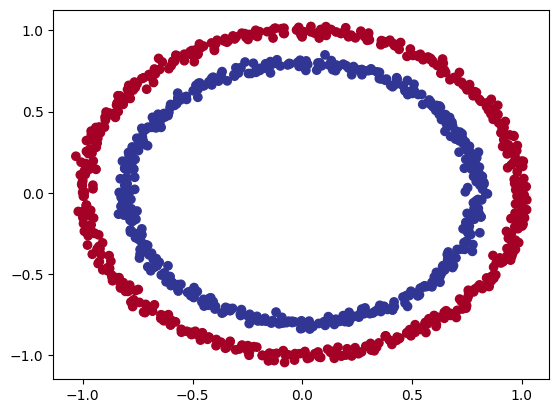

In [8]:
#exploring the circle datasets by visiualizing it
plt.scatter(Circles["X1"] , Circles["X2"] , c= y , cmap = plt.cm.RdYlBu);

Note: the data we are working with is often reffered to as toy dataset , a dataset that is samll enough to experiment but still sizeable enough to practice

1.1 Check input and output shapes

In [9]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
X

In [10]:
#View the first example of features and labels

x_sample = X[0]
y_sample = y[0]

print(f"some X_sample value: {x_sample} and its y_label is : {y_sample}")
print(f" shape of some X_sample value: {x_sample.shape} and shape of y_sample_value is :{y_sample.shape}")

some X_sample value: [0.76026594 0.22387823] and its y_label is : 1
 shape of some X_sample value: (2,) and shape of y_sample_value is :()


1.2 Converting data into tensors
 - as the DataFrame provide us the values in arrays and we need to convert them into tensors to do the next processing

In [11]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X) , X.dtype , y.dtype

1.3 Spliting the data into train/test split

In [12]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

len(x_train) ,  len(y_train) ,len(x_test), len(y_test)

(800, 800, 200, 200)

# 2. Building the Model

Lets's build our model to classify red and blue dots
To do so we need to do the following :
 - set up device agnoitic Code
 -construct a model_selection
 -define loss function and the optimizer
 -create training loop and testing loop

**2.1 Device agnoistic code**

In [13]:

import torch
from torch import nn

device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [14]:
x_train

tensor([[ 0.6483, -0.4748],
        [ 0.6464, -0.7356],
        [-1.0020, -0.1328],
        ...,
        [ 0.0231, -1.0198],
        [ 1.0036,  0.1621],
        [ 0.5568, -0.5727]])

**2.2 model building**

In order to create a model , we need to ddo the following steps:
- create a class which is inhereted with the base class nn.Module
- create linear layers that automatically set the random parameters values using nn.Linear
- define a forward function to do the computations in forward manner forward()
- instantitiate thr model or class and send it to the target device

In [15]:
#creating a class inherited with nn.Module to build a model
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer0 = nn.Linear(in_features =2  , out_features = 5)
    self.linear_layer1 = nn.Linear(in_features = 5 , out_features = 1)

#defiining a forward method

  def forward(self , x):
    return self.linear_layer1(self.linear_layer0(x)) # x-> self.linear_layer0 -> self.linear_layer1

#instantitiate the class and setting the model to run on gpu

model_0 = CircleModelv0().to(device)

next(model_0.parameters()).device


device(type='cpu')

**Note:**
- Another method of creating a linear model is using the nn.Sequential () which automaticaly stack the linear layers and the forward computations i.e passing one input layer out to the other layer as an input

- question arise this is the simplest and easiest way then why creating the class and manually creating the layers and then doing a forward pass .The answer is for simple linear task or data nn.Sequential is perfect but when we want to cutomize the input and layers the we can define a class of the model and define a forward function to do the computations

In [16]:
# another method of creating model
#replicate the above model by nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2315, -0.3415],
                      [-0.5431, -0.0898],
                      [ 0.2191,  0.0087],
                      [ 0.4462,  0.0671],
                      [-0.4549,  0.0502]])),
             ('0.bias', tensor([ 0.5080, -0.6738,  0.2382, -0.4288, -0.1033])),
             ('1.weight',
              tensor([[-0.4320, -0.0755,  0.3756,  0.2849,  0.2609]])),
             ('1.bias', tensor([-0.2142]))])

In [18]:
#Make Predictions on the untrained model
with torch.inference_mode():
  untrained_pred = model_0(x_test.to(device))

print(f" untrained predictions are : {untrained_pred[:10]}")

y_test.to(device)== (untrained_pred)

# as actual and predicted are to far from each other , In the next step we will training our model by choosing some loss function and then optimizing the parameters based on the loss

 untrained predictions are : tensor([[-0.4004],
        [-0.2593],
        [-0.6680],
        [-0.3303],
        [-0.4840],
        [-0.4017],
        [-0.1411],
        [-0.1756],
        [-0.6687],
        [-0.2429]])


tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

**2.3 Loss Function and Optimeizer**





- The selection of loss function for your model is a problem specific task .
- In case of binary classification , the most common one is Binary Cross Entropy loss
- For multi-class classification , the loss function is categorical cross entropy(cross entropy)


In [19]:
#set up the loss function
loss_fn = nn.BCEWithLogitsLoss()

#set up the optimizer
optimizer = torch.optim.SGD(params= model_0.parameters() , lr = 0.1 )

In [20]:
#calculate the accuracy in order to evaluate the model  - it means out of 100 examples , how many prediction did our model predicted correctly.
def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct / len(y_true)) *100
  return acc


# 3.Training loop and Testing loop

In order to train the model , we create a training loop , and for testing a  testing loop.

Training Loop :
- set the model in training mode
- do a forward pass
- calculate training loss
- optimizer zero grad
- back propagation
- optimizer_step

Testing loop :
- set the model in evaluation mode
- run a forward pass
- calculate testing loss
- print the information

**What are logits**

- These the raw output of the model
- we pass these raw output to the activation function to produce the prediction probabilities
- those probabilites are then rounded or converted to the formate of our actual or ground truth based on some threshold
- the threshold in many cases or by default is 0.5
  - prob>= 0.5 belongs to class 1
  - prob < 0.5 belongs to class 0

In [22]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

#device agoistic code
x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):

  #1. training
  model_0.train()

  #2.forward pass
  train_logits = model_0(x_train).squeeze() #the raw output of the model are called logits
  pred_prob = torch.sigmoid(train_logits) #passing the logits to sigmoid(activation) function to get prediction probablities
  pred_labels = torch.round(pred_prob) #rounding them to either zero or 1

  #3.Loss / accuracy
  #in case we have used BCEloss then we find the loss like
  #train_loss = loss_fn(pred_prob, y_test)
  train_loss = loss_fn(train_logits , y_train) #in our case we have used the BCEWithLogitsLoss which use logits as it had by-default sigmoid function in it
  train_acc =accuracy_fn(y_train , pred_labels)

  #4.optimizer zero grad
  optimizer.zero_grad()

  #5.back propagation
  train_loss.backward()

  #6.optimizer.step() to update the parameters
  optimizer.step()

  #TESTING

  #1.forward pass
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    pred_prob = torch.sigmoid(test_logits)
    test_pred = torch.round(pred_prob)


  #2. Loss function / Accuracy
  test_loss = loss_fn(test_logits , y_test)
  test_acc = accuracy_fn(y_test,test_pred)

  #3. Printing the information
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train_loss :{train_loss} |Train_Accuracy :{train_acc :.2f} | Test_loss {test_loss} | Test_Accuracy : {test_acc}")


Epoch : 0 | Train_loss :0.7205290198326111 |Train_Accuracy :50.00 | Test_loss 0.7242202758789062 | Test_Accuracy : 50.0
Epoch : 10 | Train_loss :0.7028934359550476 |Train_Accuracy :42.12 | Test_loss 0.7086589336395264 | Test_Accuracy : 39.5
Epoch : 20 | Train_loss :0.6973556280136108 |Train_Accuracy :47.12 | Test_loss 0.7034987807273865 | Test_Accuracy : 48.5
Epoch : 30 | Train_loss :0.6954196095466614 |Train_Accuracy :48.62 | Test_loss 0.7014248371124268 | Test_Accuracy : 48.0
Epoch : 40 | Train_loss :0.6946122646331787 |Train_Accuracy :49.75 | Test_loss 0.7003288269042969 | Test_Accuracy : 47.0
Epoch : 50 | Train_loss :0.6941906213760376 |Train_Accuracy :50.00 | Test_loss 0.6995871663093567 | Test_Accuracy : 48.0
Epoch : 60 | Train_loss :0.6939226388931274 |Train_Accuracy :50.50 | Test_loss 0.6990079283714294 | Test_Accuracy : 47.5
Epoch : 70 | Train_loss :0.6937302947044373 |Train_Accuracy :50.38 | Test_loss 0.6985264420509338 | Test_Accuracy : 47.5
Epoch : 80 | Train_loss :0.693583

#4. Make Prediction & Evaluate the Model



- From above metrics , its evident that the model is only guessing , its not learning anything.
- So to inspect this , let's make some predictions and then amke visiuals
- In other words , visiualize , visiulaize , visiualize
- To do so , we will import a function called "plot decision boundary"

In [23]:
from math import e
import requests #allaws us to make request to some website
from pathlib import Path # it allows us to  create file path

#download pytorch helper function from Learn PyTorch repo (if it's not downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping downlaod")

else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

with open("helper_functions.py","wb") as f:
  f.write(request.content)


Download helper_functions.py


## Plot decision boundary of the model

- ploting the training data
- ploting the testing data

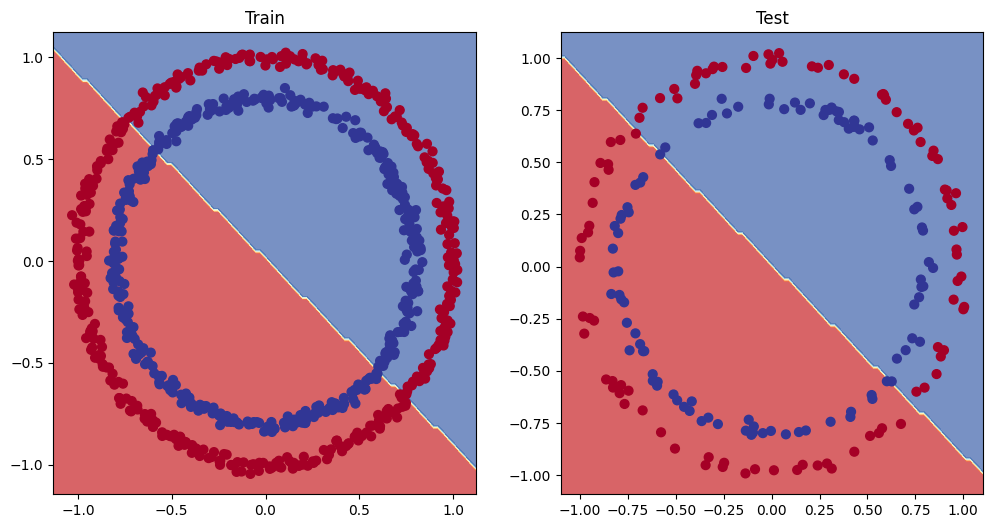

In [24]:
#import the plot_decision_boundary function from hepler_functions.py file
from helper_functions import plot_decision_boundary , plot_predictions

import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
#Traing decsion boundary
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , x_train , y_train)

#Testing

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , x_test , y_test)


# 5. Improve the Model (from medel's prespective)

**Common ways to improve a Deep Model are :**
- Adding layers
- Increase the number of hidden points
- change / add the activation function
- change the optimization function
- change the learning rate
- fitting for longer(increase epochs)

1. These model are all from the model 's prespective as they deal; directly with the model rather than data
2. These all above values are referred as hyper parameters as they are added by us .



In [37]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_0 = nn.Linear(in_features = 2 , out_features = 5)
    self.layer_1 = nn.Linear(in_features = 5 , out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 1)


  def forward_fn(self , x):
    return self.layer(self.layer_1(self.layer_0(x)))

model_1 = CircleModelv1()
model_1.state_dict()

OrderedDict([('layer_0.weight',
              tensor([[-0.5195, -0.5507],
                      [-0.5777,  0.2951],
                      [-0.4257, -0.2919],
                      [ 0.5543,  0.3754],
                      [ 0.4054, -0.6714]])),
             ('layer_0.bias',
              tensor([-0.5071, -0.2669,  0.5841,  0.0723, -0.5288])),
             ('layer_1.weight',
              tensor([[ 0.0028, -0.3473, -0.0980, -0.1230,  0.3871],
                      [ 0.1385, -0.0780,  0.0755, -0.1291,  0.1757],
                      [ 0.1769,  0.1201, -0.1743,  0.3815, -0.0646],
                      [-0.1741,  0.2801,  0.3645,  0.4450,  0.1325],
                      [-0.1525,  0.2271,  0.3837, -0.4386, -0.0554],
                      [-0.3050,  0.0833,  0.1850, -0.0924, -0.0374],
                      [ 0.2013, -0.0752, -0.3756,  0.3578, -0.2251],
                      [-0.0491,  0.0422, -0.0269, -0.4207,  0.2052],
                      [-0.2031, -0.2320,  0.1068, -0.2334, -0.2067],
  

In [38]:
#create a loss function
loss_fn1 = nn.BCEWithLogitsLoss()

#optimizer
optimizer2 = torch.optim.SGD(params = model_1.parameters(),
                              lr = 0.001)

In [39]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

#device agoistic code
x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):

  #1. training
  model_0.train()

  #2.forward pass
  train_logits = model_0(x_train).squeeze() #the raw output of the model are called logits
  pred_prob = torch.sigmoid(train_logits) #passing the logits to sigmoid(activation) function to get prediction probablities
  pred_labels = torch.round(pred_prob) #rounding them to either zero or 1
  #3.Loss / accuracy
  #in case we have used BCEloss then we find the loss like
  #train_loss = loss_fn(pred_prob, y_test)
  train_loss = loss_fn(train_logits , y_train) #in our case we have used the BCEWithLogitsLoss which use logits as it had by-default sigmoid function in it
  train_acc =accuracy_fn(y_train , pred_labels)

  #4.optimizer zero grad
  optimizer.zero_grad()

  #5.back propagation
  train_loss.backward()

  #6.optimizer.step() to update the parameters
  optimizer.step()

  #TESTING

  #1.forward pass
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    pred_prob = torch.sigmoid(test_logits)
    test_pred = torch.round(pred_prob)


  #2. Loss function / Accuracy
  test_loss = loss_fn(test_logits , y_test)
  test_acc = accuracy_fn(y_test,test_pred)

  #3. Printing the information
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train_loss :{train_loss} |Train_Accuracy :{train_acc :.2f} | Test_loss {test_loss} | Test_Accuracy : {test_acc}")


Epoch : 0 | Train_loss :0.693378210067749 |Train_Accuracy :51.00 | Test_loss 0.6974549889564514 | Test_Accuracy : 47.0
Epoch : 10 | Train_loss :0.6933057308197021 |Train_Accuracy :51.12 | Test_loss 0.6971871852874756 | Test_Accuracy : 46.0
Epoch : 20 | Train_loss :0.6932475566864014 |Train_Accuracy :50.75 | Test_loss 0.6969528794288635 | Test_Accuracy : 46.0
Epoch : 30 | Train_loss :0.6932007074356079 |Train_Accuracy :50.88 | Test_loss 0.696746826171875 | Test_Accuracy : 46.0
Epoch : 40 | Train_loss :0.6931629180908203 |Train_Accuracy :51.12 | Test_loss 0.6965649127960205 | Test_Accuracy : 46.0
Epoch : 50 | Train_loss :0.6931321620941162 |Train_Accuracy :50.88 | Test_loss 0.6964037418365479 | Test_Accuracy : 46.0
Epoch : 60 | Train_loss :0.6931073665618896 |Train_Accuracy :51.25 | Test_loss 0.6962602734565735 | Test_Accuracy : 45.5
Epoch : 70 | Train_loss :0.6930869817733765 |Train_Accuracy :51.12 | Test_loss 0.6961323022842407 | Test_Accuracy : 46.0
Epoch : 80 | Train_loss :0.69307035

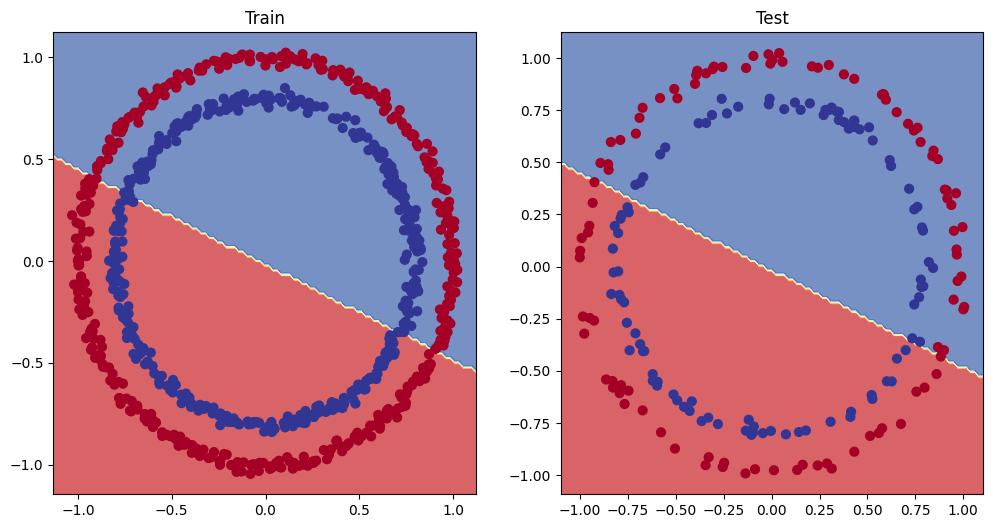

In [41]:
#import the plot_decision_boundary function from hepler_functions.py file
from helper_functions import plot_decision_boundary , plot_predictions

import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
#Traing decsion boundary
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , x_train , y_train)

#Testing

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , x_test , y_test)

# Note : still accuracy metric shows our model is not learning anything using this linear model

**what is wrong ?** we are trying to separate a non linear data using a linear model .